# Ellipsoids

We check the relative orientations of our ellispoids by computing their belonging function within this [SageMath](https://www.sagemath.org/) notebook and then plotting them with [Geogebra](https://www.geogebra.org/).

## Relative orientations

We have that the quaternion $q \equiv (q_0, \vec{q}^T)$ and $\vec{q} = \begin{pmatrix} q1 \\ q2 \\ q3 \end{pmatrix}$ describes the rotation matrix
$$
Q_q = (\vec{q} \times \cdot + q_0 I_3)^2 + \vec{q} \, \vec{q}^T,
$$
which can be expanded to
$$
Q_q = \begin{pmatrix}
  1 - 2 (q_2^2 + q_3^2) & 2 (q_1 q_2 - q_0 q_3) & 2 (q_1 q_3 + q_0 q_2) \\
  2 (q_1 q_2 + q_0 q_3) & 1 - 2 (q_1^2 + q_3^2) & 2 (q_2 q_3 - q_0 q_1) \\
  2 (q_1 q_3 - q_0 q_2) & 2 (q_2 q_3 + q_0 q_1) & 1 - 2 (q_1^2 + q_2^2)
\end{pmatrix}.
$$

In [4]:
def Qq(q0, q1, q2, q3):
    """
    Associate rotation matrix to quaternion.
    """
    
    Q = Matrix(
        [[1 - 2*(q2**2 + q3**2), 2*(q1*q2 - q0*q3), 2*(q1*q3 + q0*q2)],
         [2*(q1*q2 + q0*q3), 1 - 2*(q1**2 + q3**2), 2*(q2*q3 - q0*q1)],
         [2*(q1*q3 - q0*q2), 2*(q2*q3 + q0*q1), 1 - 2*(q1**2 + q2**2)]])
    return Q

With $(R_1, R_2, R_3)$ the lengths of each semi-axes in the directions $(x, y, z)$, we have the reduced belonging matrix
$$
\overline{B} = Q \begin{pmatrix} R_1^{-2} & 0 & 0 \\ 0 & R_2^{-2} & 0 \\ 0 & 0 & R_3^{-2} \end{pmatrix} Q^T.
$$

In [5]:
def Bbar(q0, q1, q2, q3, R1, R2, R3):
    """
    Associate reduced belonging matrix to quaternion and semi-axes.
    """
    
    Q = Qq(q0, q1, q2, q3)
    diag = Matrix([[1/(R1**2), 0, 0], [0, 1/(R2**2), 0], [0, 0, 1/(R3**2)]])
    return Q*diag*Q.transpose()

We have $\alpha = 2.5$ the aspect ratio.

##### First ellispoid

The first ellispoid is a big one with major semi-axis length $R_{11} = 0.7$, we thus have
$$
R_{21} = R_{31} = R_{11}/\alpha.
$$

From the data, it is located at
$$
\vec{v}_1 = \begin{pmatrix} 4.59765 \\ -21.8847 \\ -18.7785 \end{pmatrix},
$$
and is described by the quaternion
$$
q_1 = (q_{01}, q_{11}, q_{21}, q_{31}) = (-0.122748, 0.177502, -0.95229, 0.215802).
$$

##### Second ellispoid

The second ellispoid is a small one. We have the small to big ratio $R_{11}/R{12} = 1.4$, therefore
$$
R_{12} = R_{11}/1.4, R_{22} = R_{21}/1.4, R_{32} = R_{31}/1.4.
$$

From the data, it is located at
$$
\vec{v}_2 = \begin{pmatrix} 4.83132 \\ -21.7165 \\ -20.6201 \end{pmatrix},
$$
and is described by the quaternion
$$
q_2 = (q_{02}, q_{12}, q_{22}, q_{32}) = (-0.116927, -0.737674, 0.114698, -0.654988).
$$

In [6]:
alpha = 2.5 # aspect ratio
smalltobig = 1.4 # small to big radius ratio

# First ellispoid

q01, q11, q21, q31 = -0.122748, 0.177502, -0.95229, 0.215802
R11 = 0.7
R21 = R31 = R11/alpha
v1 = Matrix([[4.59765], [-21.8847], [-18.7785]])

print('FIRST ELLIPSOID')
print('Quaternion: (%f, %f, %f, %f)' % (q01, q11, q21, q31))
print('Semi-axes: (%f, %f, %f)' % (R11, R21, R31))
print('Centre:')
print(v1)

print('Reduced belonging matrix:')
Bbar1 = Bbar(q01, q11, q21, q31, R11, R21, R31)
print(Bbar1)

print()

# Second ellipsoid

q02, q12, q22, q32 = -0.116927, -0.737674, 0.114698, -0.654988
R12, R22, R32 = R11/smalltobig, R21/smalltobig, R31/smalltobig
v2 = Matrix([[4.83132], [-21.7165], [-20.6201]])

print('SECOND ELLISPOID')
print('Quaternion: (%f, %f, %f, %f)' % (q02, q12, q22, q32))
print('Semi-axes: (%f, %f, %f)' % (R12, R22, R32))
print('Centre:')
print(v2)

print('Reduced Belonging matrix:')
Bbar2 = Bbar(q02, q12, q22, q32, R12, R22, R32)
print(Bbar2)

FIRST ELLIPSOID
Quaternion: (-0.122748, 0.177502, -0.952290, 0.215802)
Semi-axes: (0.700000, 0.280000, 0.280000)
Centre:
[ 4.59765000000000]
[-21.8847000000000]
[-18.7785000000000]
Reduced belonging matrix:
[  3.94389070391919  -3.79950169436130  -1.52713774770834]
[ -3.79950169436130   11.1167149670264 -0.658509915760596]
[ -1.52713774770834 -0.658509915760598   12.4904611873514]

SECOND ELLISPOID
Quaternion: (-0.116927, -0.737674, 0.114698, -0.654988)
Semi-axes: (0.500000, 0.200000, 0.200000)
Centre:
[ 4.83132000000000]
[-21.7165000000000]
[-20.6201000000000]
Reduced Belonging matrix:
[  24.7190182187781 0.0389795462774067  -2.41244221167954]
[0.0389795462774067   24.9945688881201  0.334698303833604]
[ -2.41244221167954  0.334698303833604   4.28637525650281]


With $\vec{r} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$ we have the belonging function of an ellispoid at $\vec{v}$ described by the reduced belonging matrix $\overline{B}$
$$
f(x, y, z) = (\vec{r} - \vec{v})^T \, \overline{B} \, (\vec{r} - \vec{v}) - 1,
$$
such that $f(x, y, z) \leq 0 \Leftrightarrow \vec{r}$ is located inside the ellipsoid. 

In [7]:
def belfunc(v, B):
    """
    Returns belonging function of ellispoid with centre `v' and reduced belonging matrix `B'.
    """
    
    X = Matrix([[var('x')], [var('y')], [var('z')]])
    
    return (expand((X - v).transpose()*B*(X - v)) - 1)[0, 0]

In order to make plotting easier, we compute the belonging functions for the first ellispoids located at $\begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$ and the second at $\vec{v}_2 - \vec{v}_1$.

In [8]:
# First ellispoid

print('FIRST ELLIPSOID')
print('Belonging function:')
print('f1(x, y, z) =', belfunc(v1 - v1, Bbar1))

print()

# Seond ellispoid

print('SECOND ELLIPSOID')
print('Belonging function:')
print('f2(x, y, z) =', belfunc(v2 - v1, Bbar2))

FIRST ELLIPSOID
Belonging function:
f1(x, y, z) = 3.94389070391919*x^2 - 7.59900338872261*x*y + 11.1167149670264*y^2 - 3.05427549541667*x*z - 1.31701983152119*y*z + 12.4904611873514*z^2 - 1

SECOND ELLIPSOID
Belonging function:
f2(x, y, z) = 24.7190182187781*x^2 + 0.0779590925548135*x*y + 24.9945688881201*y^2 - 4.82488442335907*x*z + 0.669396607667209*y*z + 4.28637525650281*z^2 - 20.4508058477895*x - 7.19362888244089*y + 16.8024155785478*z + 17.4660183549666


We now plot $f_1(x, y, z) = 0$ and $f_2(x, y, z) = 0$ with [Geogebra](https://www.geogebra.org/).

## Intersection

We follow the Perram and Wertheim method in order to compute the contact function and its maximum, and thus determine if the ellipsoids are overlapping.

We first denote for our two ellispoids described by the respective belonging matrices $\overline{B}_1$ and $\overline{B}_2$ and centres $\vec{v}_1$ and $\vec{v}_2$, the matrix
$$
Y(\eta) = \eta \overline{B}_2^{-1} + (1 - \eta) \overline{B}_1^{-1}.
$$

In [18]:
eta = var('eta')
Y = eta*Bbar2.inverse() + (1 - eta)*Bbar1.inverse()

We can then write the contact function
$$
\begin{aligned}
F(\eta) &= \eta (1 - \eta) (\vec{v}_2 - \vec{v}_1)^T \, Y(\eta)^{-1} \, (\vec{v}_2 - \vec{v}_1)\\
&= \frac{\eta (1 - \eta) (\vec{v}_2 - \vec{v}_1)^T \, \text{adj}(Y(\eta)) \, (\vec{v}_2 - \vec{v}_1)}{\text{det}(Y(\eta))} \equiv \frac{p(\eta)}{q(\eta)},
\end{aligned}
$$
where $\text{ajd}$ denotes the adjugate matrix — the transpose of the cofactor matrix — and $\text{det}$ the determinant.

In [19]:
p = eta*(1 - eta)*((v2 - v1).transpose())*(Y.adjugate())*(v2 - v1)
q = Y.determinant()
F = expand(p/q)[0, 0]

According to Perram and Wertheim, there is an unique maximum of $F(\eta)$ between 0 and 1. We determine this maximum by looking the root of its derivative
$$
F^{\prime}(\eta) = \frac{p^{\prime}(\eta) q(\eta) - p(\eta) q^{\prime}(\eta)}{q^2(\eta)},
$$
which is equivalent to finding the root of
$$
h(\eta) = p^{\prime}(\eta) q(\eta) - p(\eta) q^{\prime}(\eta),
$$
provided that $q(\eta) \neq 0$.

h(eta) = -0.0001595973509325443*eta^6 + 0.0008442274539711006*eta^5 - 0.0012207001348191445*eta^4 - 0.000507511576441382*eta^3 + 0.00255165571215795*eta^2 - 0.00191300405166246*eta + 0.00040197537383020166


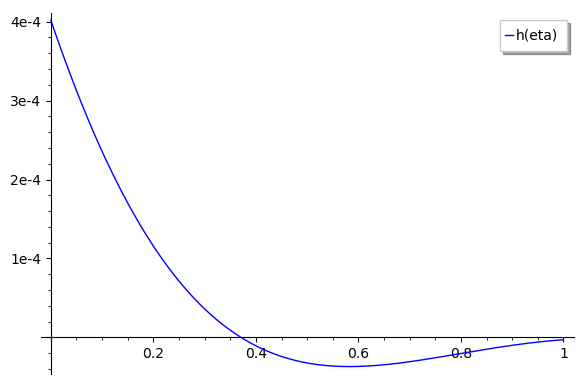

In [20]:
h = expand(p.derivative(eta)*q - p*q.derivative(eta))[0, 0]
print('h(eta) =', h)
plot(h, (eta, 0, 1), legend_label='h(eta)')

According to the plot above, there is indeed an unique root of $h(\eta)$ between 0 and 1. We use [Halley's method](https://en.wikipedia.org/wiki/Halley%27s_method) to determine this root.

It is an iterative method defined by
$$
\eta_{n + 1} = \eta_n - \frac{h(\eta_n)}{h^{\prime}(\eta_n)}\left[1 - \frac{h(\eta_n)}{h^{\prime}(\eta_n)} \cdot \frac{h^{\prime\prime}(\eta_n)}{2 h^{\prime}(\eta_n)}\right]^{-1}.
$$
Following Donev, we choose
$$
\eta_0 = \frac{R_{11}}{R_{11} + R_{12}}
$$
as the initial guess of the root since it is the exact solution for spheres.

In [21]:
epsilon = 1e-12 # error margin

hp = h.derivative(eta)
hpp = hp.derivative(eta)

etan = R11/(R11 + R12) # initial guess
iterations = 0 # number of iterations
while abs(h(etan)) > epsilon: # Hayley's method iteration
    iterations += 1
    etan = etan - (h(etan)/hp(etan))/(1 - (h(etan)/hp(etan))*(hpp(etan)/(2*hp(etan))))

print('Root estimate: eta =', etan)
print('Number of iterations:', iterations)

Root estimate: eta = 0.370848824365236
Number of iterations: 24


We have the rescaling factor
$$
\mu = \sqrt{\max_{0 < \eta < 1} F(\lambda)}.
$$

In [22]:
mu = sqrt(F(etan))
print('Rescaling factor:', mu)

Rescaling factor: 2.44291347217997


We have $\mu > 1$, therefore ellispoids are not overlapping.

We can confirm we have computed the right rescaling factor by plotting the rescaled ellipsoids. We thus compute the corresponding belonging functions.

In [23]:
# First ellispoid

print('FIRST ELLIPSOID')
print('Belonging function:')
print('f1(x, y, z) =', belfunc(v1 - v1, Bbar(q01, q11, q21, q31, R11*mu, R21*mu, R31*mu)))

print()

# Seond ellispoid

print('SECOND ELLIPSOID')
print('Belonging function:')
print('f2(x, y, z) =', belfunc(v2 - v1, Bbar(q02, q12, q22, q32, R12*mu, R22*mu, R32*mu)))

FIRST ELLIPSOID
Belonging function:
f1(x, y, z) = 0.660858837075833*x^2 - 1.27332852744020*x*y + 1.86277457382680*y^2 - 0.511790286177168*x*z - 0.220686692306151*y*z + 2.09296663485403*z^2 - 1

SECOND ELLIPSOID
Belonging function:
f2(x, y, z) = 4.14204724727401*x^2 + 0.0130632309850942*x*y + 4.18821995046678*y^2 - 0.808482726429964*x*z + 0.112167576866634*y*z + 0.718247329843123*z^2 - 3.42684338498615*x - 1.20540186696371*y + 2.81550013753411*z + 2.09426207053791
